<a href="https://colab.research.google.com/github/fisicorj/astrofisica/blob/main/Diagrama_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [21]:
# Tente ler o arquivo CSV com diferentes codificações
try:
    data = pd.read_csv('estrelas.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('estrelas.csv', encoding='latin1')
    except UnicodeDecodeError:
        data = pd.read_csv('estrelas.csv', encoding='cp1252')

# Verificar os dados carregados e as colunas disponíveis
print("Dados carregados:")
print(data.head())
print("\nColunas disponíveis:")
print(data.columns)

# Verificar os nomes das colunas e ajustar se necessário
colunas_esperadas = ['Star', 'SpType', 'Teff(kK)', 'logg(cgs)']
colunas_disponiveis = list(data.columns)

Dados carregados:
        Star      SpType  Teff(kK)  logg(cgs)
0   SK-66°18         O6V      38.0        3.7
1   SK-71°19       O6III      39.0        4.1
2   SK-71°50     O6.5III      35.0        3.5
3     N11048  O6.5V((f))      41.0        4.3
4  SK-66°152     O7Ib(f)      32.9        3.2

Colunas disponíveis:
Index(['Star', 'SpType', 'Teff(kK)', 'logg(cgs)'], dtype='object')


In [22]:
# Ajustar nomes das colunas se necessário (por exemplo, remover espaços em branco)
data.columns = data.columns.str.strip()

# Verificar se todas as colunas esperadas estão presentes
for coluna in colunas_esperadas:
    if coluna not in data.columns:
        raise ValueError(f"A coluna esperada '{coluna}' não foi encontrada no arquivo CSV.")

# Verificar dados nulos
if data.isnull().values.any():
    print("\nAtenção: Existem valores nulos nos dados!")

# Verificar tipos de dados
print("\nTipos de dados:")
print(data.dtypes)


Tipos de dados:
Star          object
SpType        object
Teff(kK)     float64
logg(cgs)    float64
dtype: object


In [23]:
# Extrair dados relevantes
star_names = data['Star']
sp_types = data['SpType']
teff_values = data['Teff(kK)'] * 1000  # Converter kK para K
log_g_values = data['logg(cgs)']

In [24]:
# Determinar cores com base na temperatura
cores = []
for teff in teff_values:
    if teff < 6000:  # Estrelas mais frias (vermelhas)
        cores.append('red')
    else:  # Estrelas mais quentes (azuis)
        cores.append('blue')

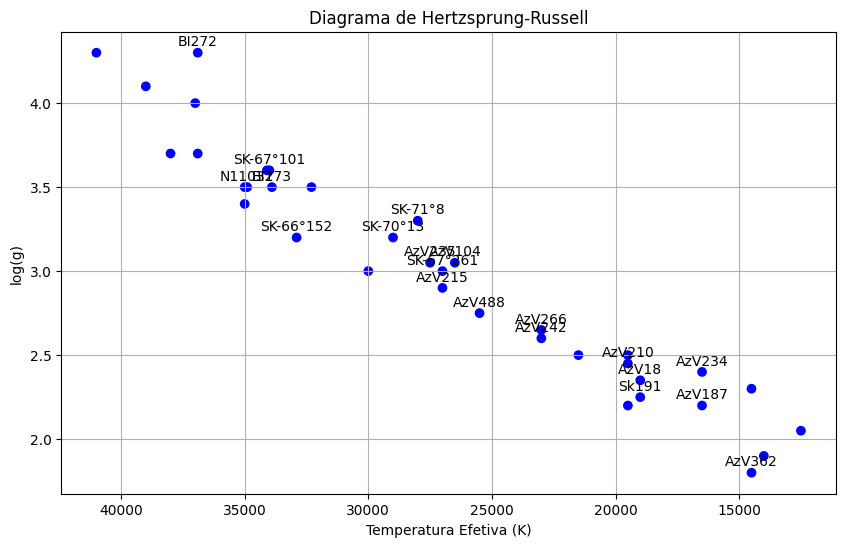

In [28]:
# Criar gráfico
plt.figure(figsize=(10, 6))
plt.scatter(teff_values, log_g_values, color=cores)

# Anotações
max_annotations = 20  # Número máximo de anotações
if len(star_names) > max_annotations:
    sampled_indices = random.sample(range(len(star_names)), max_annotations)
    for i in sampled_indices:
        plt.annotate(star_names[i], (teff_values[i], log_g_values[i]), textcoords="offset points", xytext=(0,5), ha='center')
else:
    for i, star in enumerate(star_names):
        plt.annotate(star, (teff_values[i], log_g_values[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Configurar eixos
plt.gca().invert_xaxis()  # Inverter eixo x para ter temperaturas altas à esquerda
plt.xlabel('Temperatura Efetiva (K)')
plt.ylabel('log(g)')
plt.title('Diagrama de Hertzsprung-Russell')
plt.grid(True)

# Mostrar gráfico
plt.show()
